## PREDICTION AND CLASSIFICATION OF BREAST CANCER USING MACHINE LEARNING TECHNIQUES

The main aim of my study is to classify whether the breast cancer is malignant or benign and 
also help predict the reappearance and non-recurrence of cases classified as malignant. To 
achieve this, I plan to use Machine Learning classification methods that can predict the discrete 
class of the input, and finally form a comparative analysis of the accuracies of the different ML 
models.

The dataset used for this analysis is available on the UCI Machine Learning repository https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

### Import Libraries

In [1]:
#Importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score


import warnings
warnings.simplefilter('ignore')

### Loading the dataset

In [2]:
breast_cancer_data= pd.read_csv("data.csv")
breast_cancer_data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Analysis of the target variable and features of this dataset

In [3]:
print("Number of Data Points: {}".format(breast_cancer_data.shape[0])) 
print("Number of Features/Attributes: {}".format(breast_cancer_data.shape[1])) 
print("The Features/Attributes are: \n", breast_cancer_data.columns) 

Number of Data Points: 569
Number of Features/Attributes: 33
The Features/Attributes are: 
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### Data cleaning and preprocessing

In [4]:
breast_cancer_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
drop_list= ['Unnamed: 32','id']
breast_cancer_data.drop(drop_list, axis=1, inplace= True)

In [6]:
breast_cancer_data.isnull().values.any()

False

In [7]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Exploratory Data Analysis

In [8]:
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Figure size 432x288 with 0 Axes>

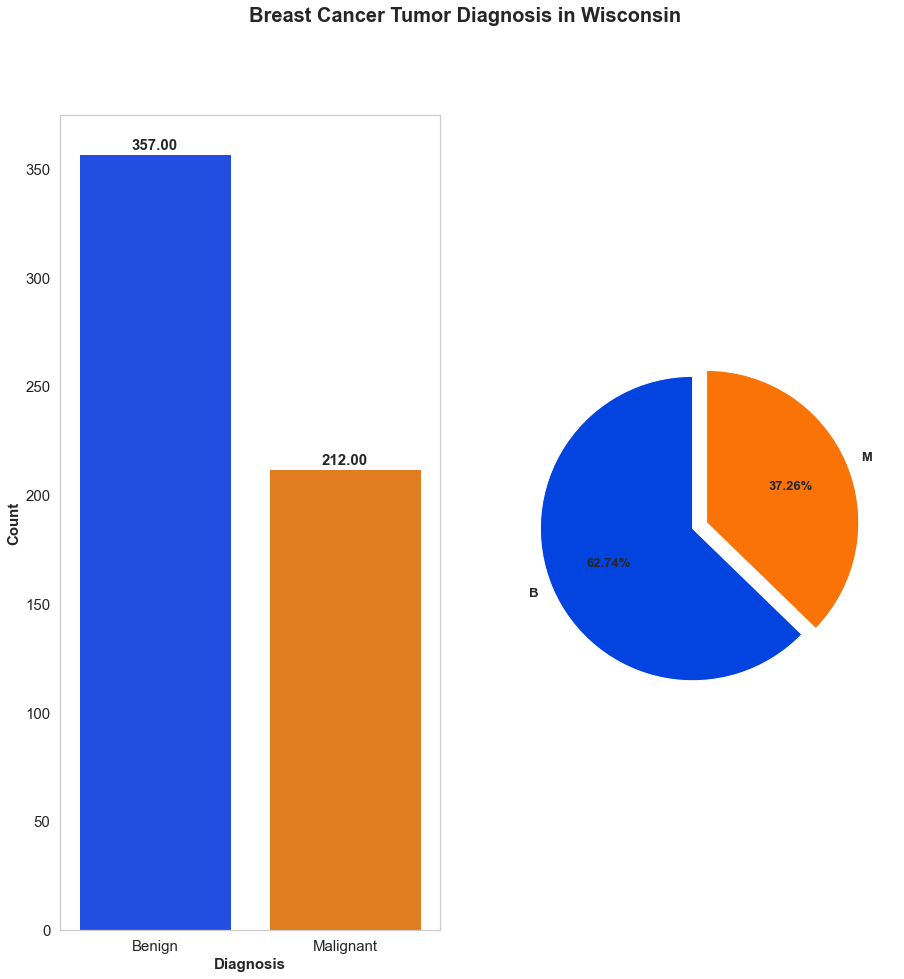

In [9]:
sns.set(style="whitegrid", palette="bright", color_codes=True)
cd=pd.DataFrame(breast_cancer_data['diagnosis'].value_counts())
cd.reset_index(inplace=True)
cd.columns=['Diagnosis','Count']
fig=plt.figure(linewidth=10, edgecolor="#04253a")
fig=plt.figure(figsize=(15,15))
fig.suptitle("Breast Cancer Tumor Diagnosis in Wisconsin",fontsize=20, fontweight='bold')
plt.subplot(1,2,1)
plots=sns.barplot(x='Diagnosis',y='Count',data=cd)
#for displaying 
for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   fontsize=15, fontweight='bold',xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Diagnosis",fontsize=15,fontweight='bold')
plt.ylabel("Count",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
labels=['Benign','Malignant']
plots.set_xticklabels(labels)
plots.yaxis.grid(linewidth=0.5,color='black')
plots.set_axisbelow(True)

diagnosis = breast_cancer_data['diagnosis'].value_counts()
    
diagnosis_size = diagnosis.values
diagnosis_label = diagnosis.index
colors= ['#0343DF','#F97306']
exp = [0.1, 0]

def prob(x): 
    return '{:.2f}'.format(x) + '%'
plt.subplot(1,2,2)
plt.pie(diagnosis_size, labels=diagnosis_label, startangle=90, colors=colors, explode=exp, autopct=prob, textprops={'fontsize': 13, 'fontweight': 'bold'})
plt.show()

From the above visualization, we can see that out of 569 cases,  357 cases i.e. 62.74% of the total cases are Benign while 212 cases i.e. 37.26% are Malignant.

### Correlation of the features with Diagnosis

#### 1. Correlation of Mean Features with Diagnosis

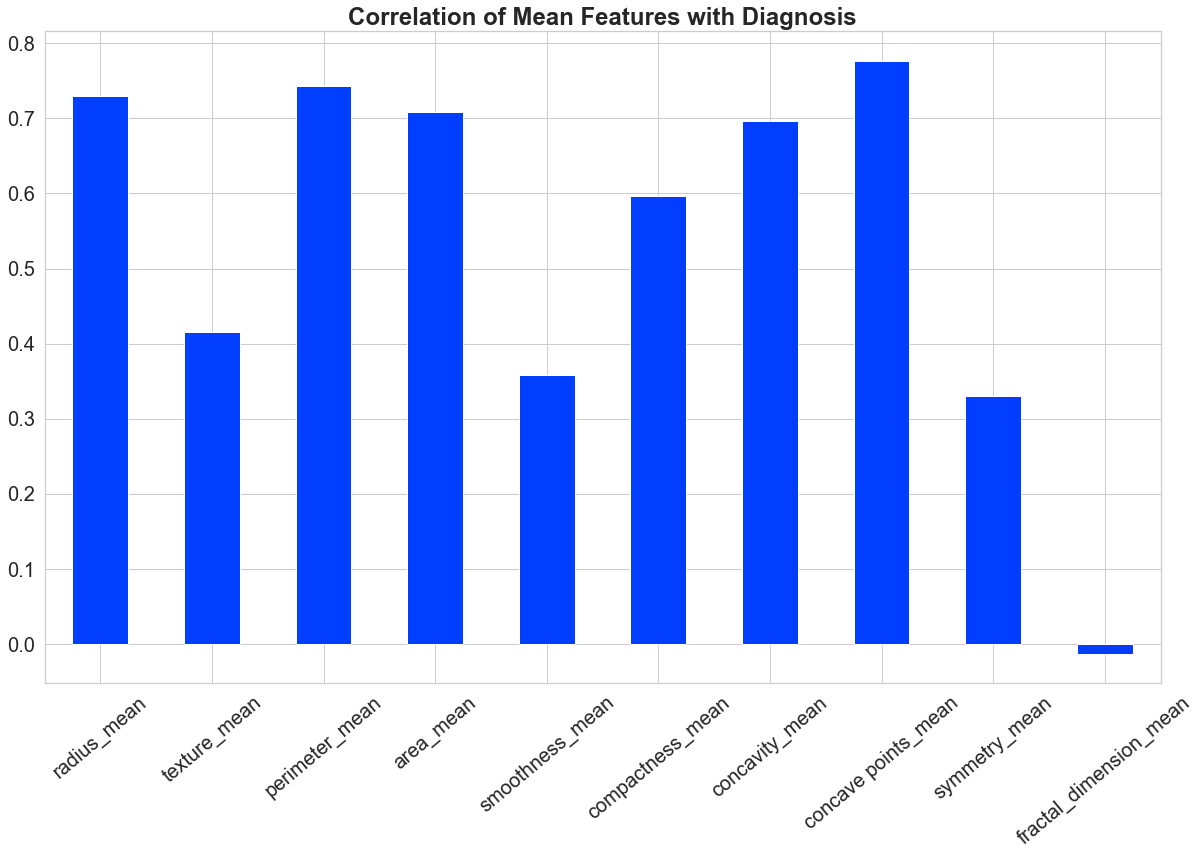

In [10]:
bcdf= breast_cancer_data.copy()
#drop_list= ['Unnamed: 32','id']
#bcdf.drop(drop_list, axis=1, inplace= True)
le = LabelEncoder()
bcdf['diagnosis']= le.fit_transform(bcdf['diagnosis'])

plt.figure(figsize=(20, 12))
mean_features= bcdf[bcdf.columns[:11]]

mean_features.drop('diagnosis', axis=1).corrwith(mean_features.diagnosis).plot(kind='bar', grid=True, fontsize=20)
plt.title("Correlation of Mean Features with Diagnosis", fontsize=24, fontweight='bold')
plt.xticks(rotation=40)
plt.show()

From the above bar graph, we can see that the fractal_dimension_mean attribute is the most weakly correlated feature with the target variable while all the other features have significant correlation.

#### 2. Correlation of Squared Error Features with Diagnosis

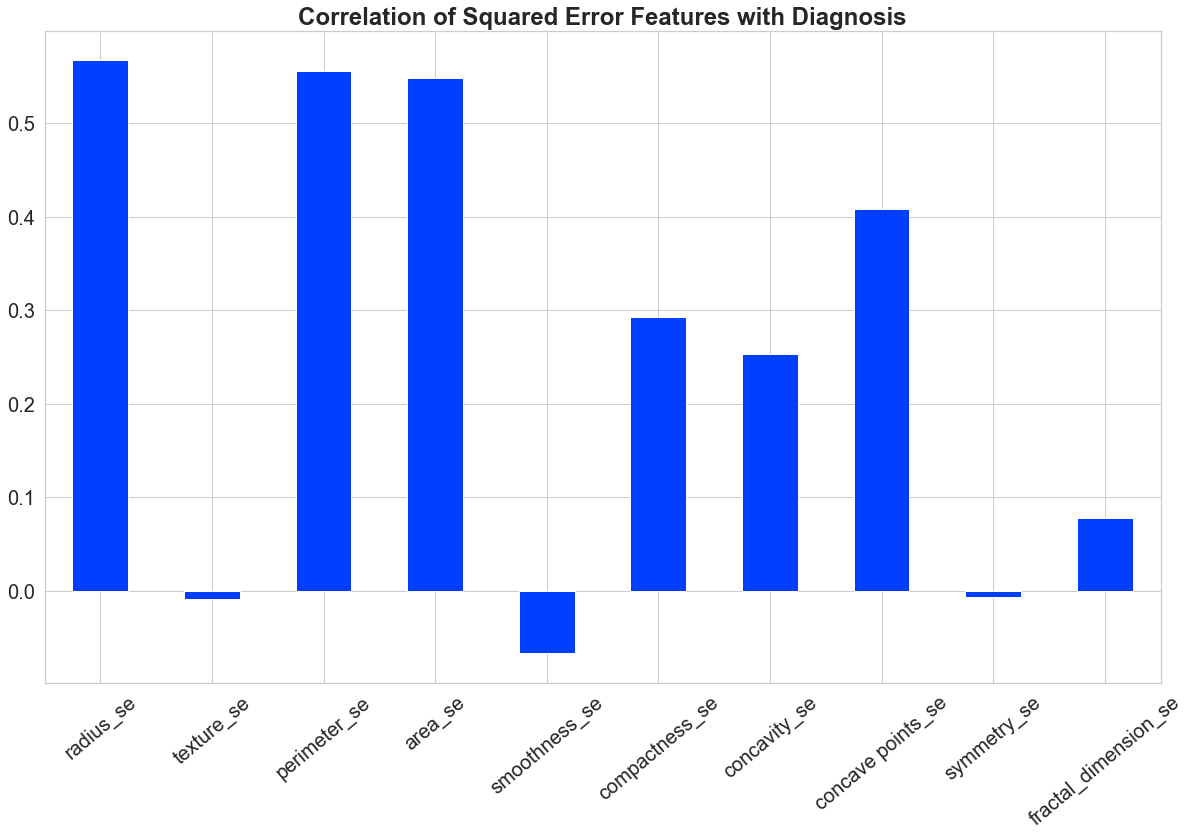

In [11]:
bcdf= breast_cancer_data.copy()
#drop_list= ['Unnamed: 32','id']
#bcdf.drop(drop_list, axis=1, inplace= True)
le = LabelEncoder()
bcdf['diagnosis']= le.fit_transform(bcdf['diagnosis'])


se_features= bcdf.drop(bcdf.columns[1:11], axis=1)
se_features= se_features.drop(se_features.columns[11:], axis=1)

plt.figure(figsize=(20, 12))

se_features.drop('diagnosis', axis=1).corrwith(se_features.diagnosis).plot(kind='bar', grid=True, fontsize=20)
plt.title("Correlation of Squared Error Features with Diagnosis", fontsize=24, fontweight='bold')
plt.xticks(rotation=40)
plt.show()

From the above bar graph, we can see that the features texture_se, smoothness_se and symmetry_se are weakly correlated  with the target variable while all the other square errored features have significant correlation with the target variable 'Diagnosis'.

#### 3. Correlation of Worst Features with Diagnosis

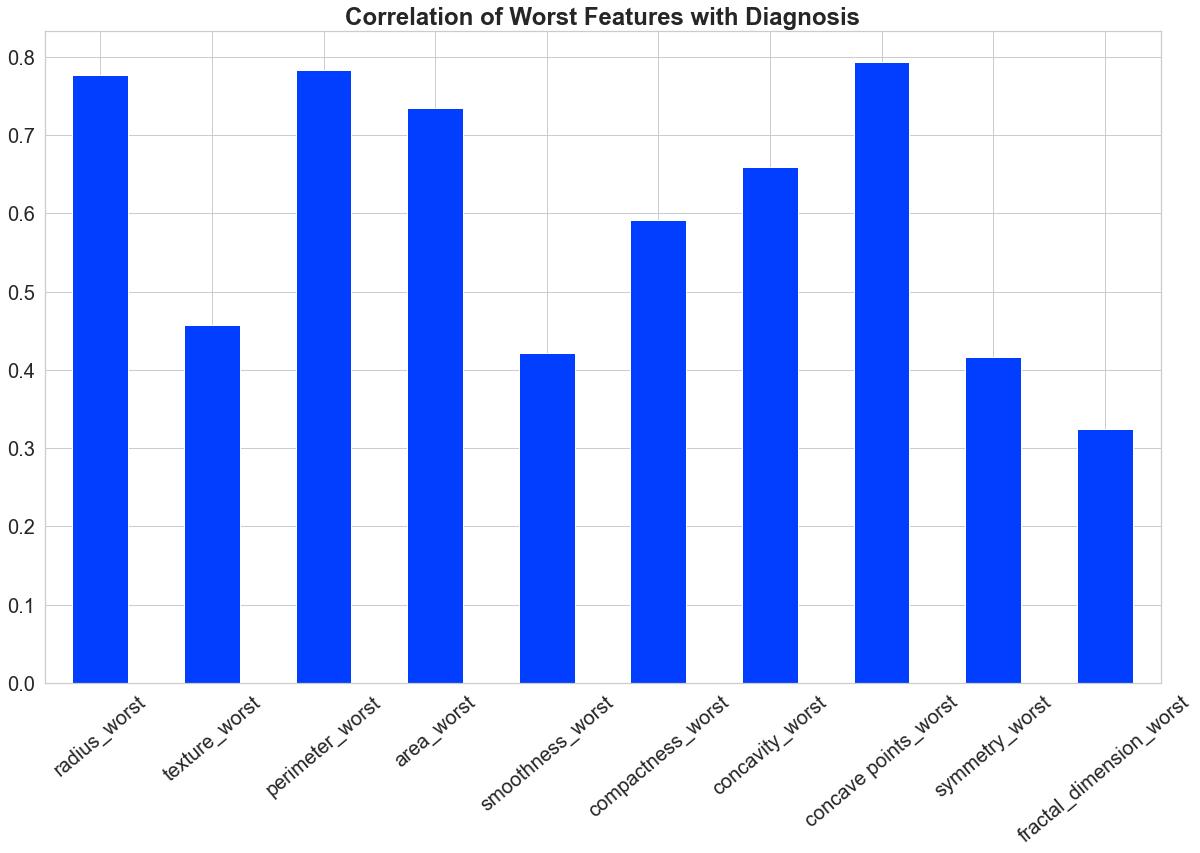

In [12]:
bcdf= breast_cancer_data.copy()
#drop_list= ['Unnamed: 32','id']
#bcdf.drop(drop_list, axis=1, inplace= True)
le = LabelEncoder()
bcdf['diagnosis']= le.fit_transform(bcdf['diagnosis'])

worst_features= bcdf.drop(bcdf.columns[1:21], axis=1)

plt.figure(figsize=(20, 12))

worst_features.drop('diagnosis', axis=1).corrwith(worst_features.diagnosis).plot(kind='bar', grid=True, fontsize=20)
plt.title("Correlation of Worst Features with Diagnosis", fontsize=24, fontweight='bold')
plt.xticks(rotation=40)
plt.show()

From the above bar graph, we can see that all the worst features have significant correlation with the target variable 'Diagnosis'.

### Distribution based on Nucleus and Diagnosis: Violin plot of the features

In [13]:
x_drop= ['diagnosis']
x= breast_cancer_data.drop(x_drop,axis=1)
x_std= (x-x.mean())/(x.std())
y= breast_cancer_data.diagnosis

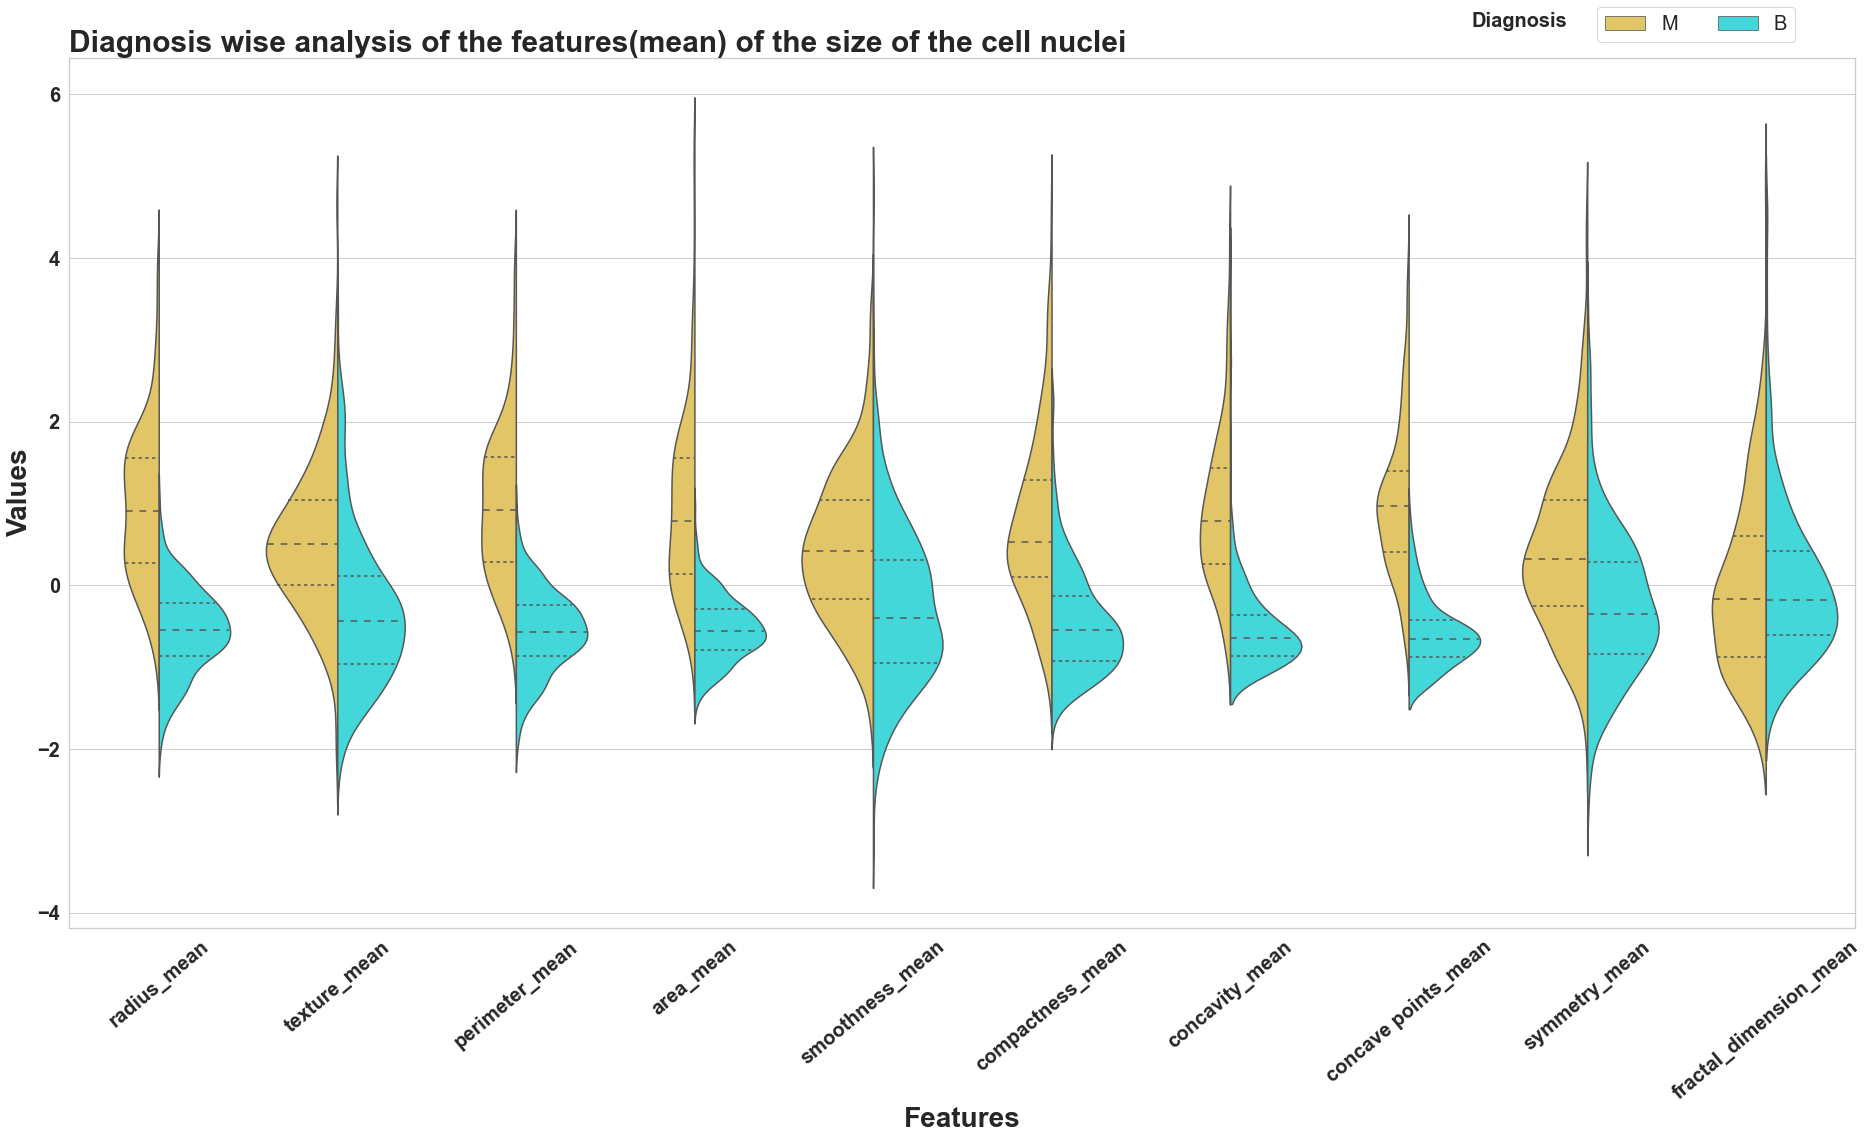

In [14]:
sns.set(style="whitegrid", palette="deep", color_codes=True)
fig,ax= plt.subplots(1, figsize=(32,16), facecolor='white')
new_data= pd.concat([y,x_std.iloc[:,0:10]],axis=1)
new_data= pd.melt(new_data,id_vars="diagnosis",var_name="Features",value_name='value')
sns.violinplot(x="Features", y="value", hue="diagnosis",
               split=True, inner="quart", color='white',
               palette={"B": "#2AEFF3", "M": "#F6D051"},
               data=new_data)

plt.title('Diagnosis wise analysis of the features(mean) of the size of the cell nuclei', fontsize=30, fontweight= 'bold', loc='left')

plt.legend(frameon=True, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
plt.text(7.35, 6.83, 'Diagnosis', fontsize=20,fontweight='bold')

plt.xticks(fontsize=20, fontweight='bold', rotation=40)
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize=28,fontweight='bold')
plt.ylabel("Values",fontsize=28,fontweight='bold')

plt.show()

From the above visualization, we can see that the features radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean are well separated between Malignant and Benign tumors. Large values of these paramters seem to show a correlation with malignant tumors indicating these parameters would be good predicators for the classifer.

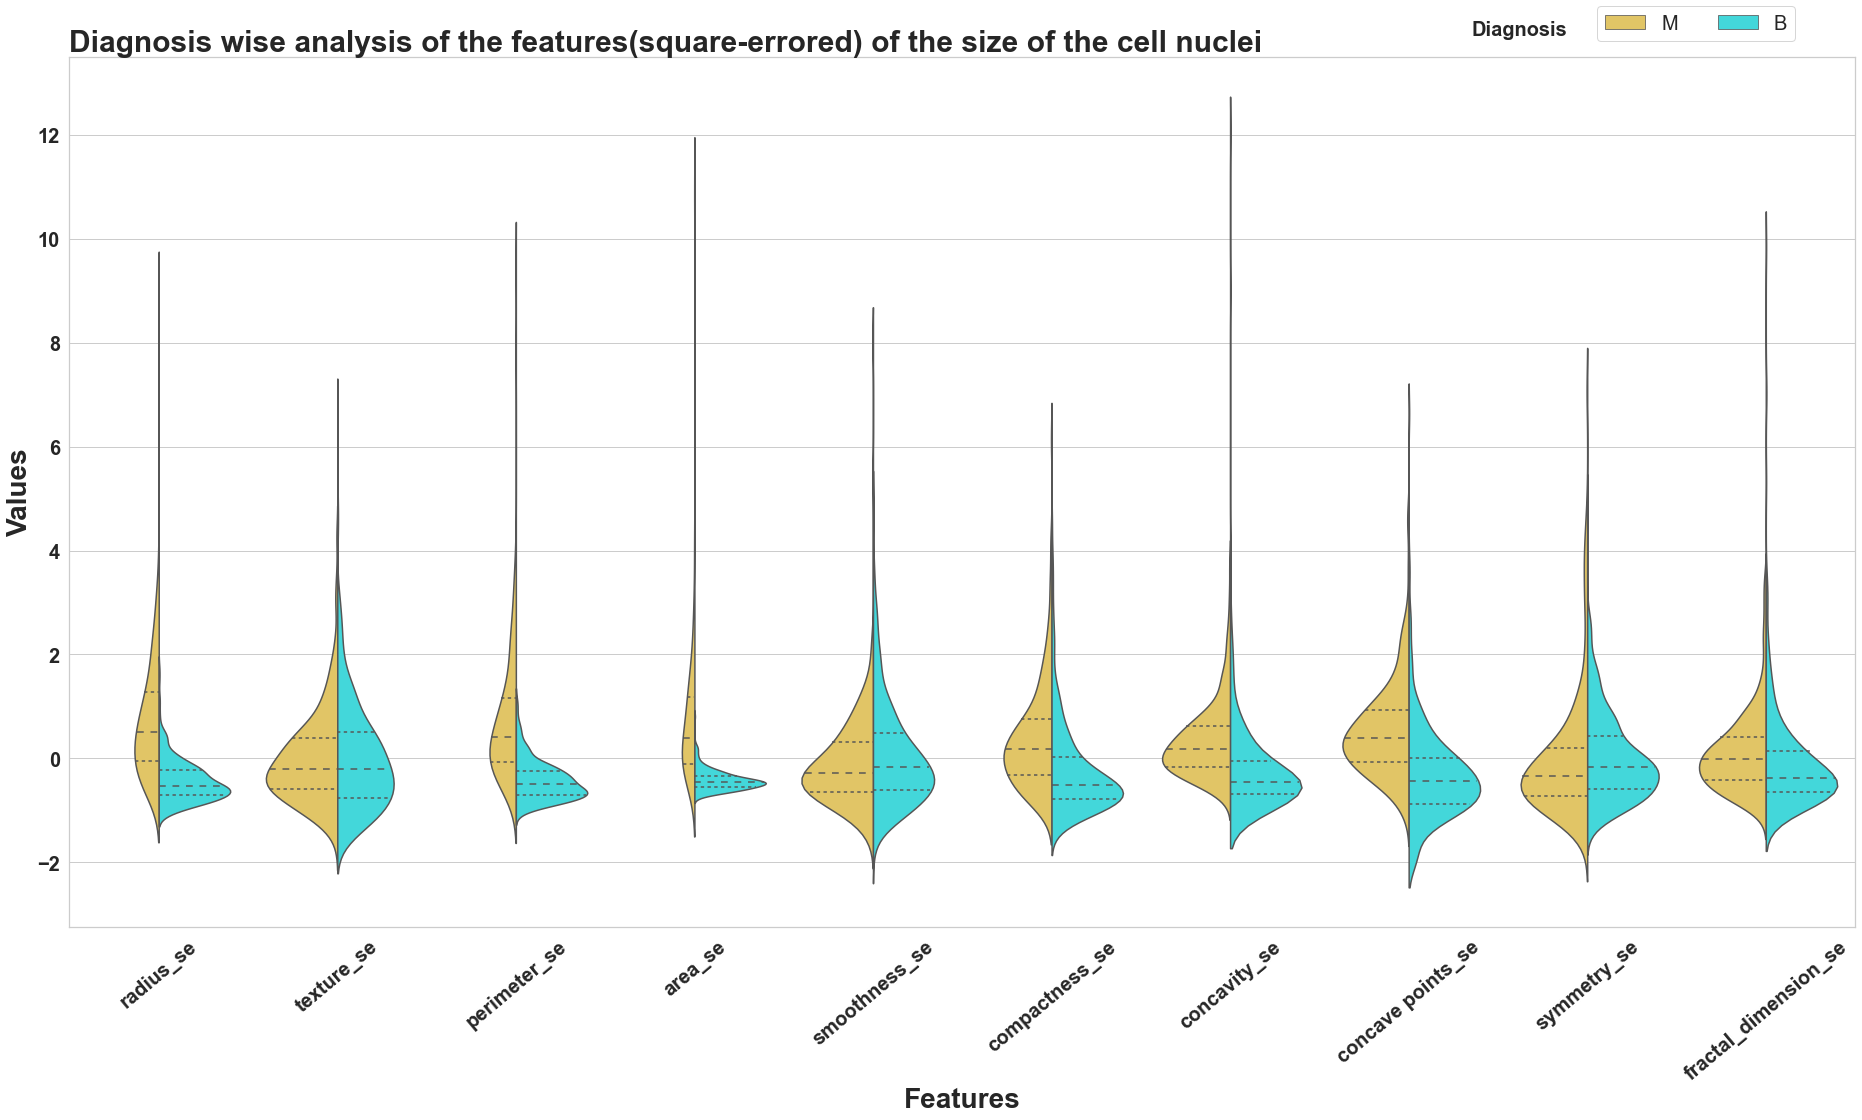

In [15]:
sns.set(style="whitegrid", palette="deep", color_codes=True)
fig,ax= plt.subplots(1, figsize=(32,16), facecolor='white')
new_data= pd.concat([y,x_std.iloc[:,10:20]],axis=1)
new_data= pd.melt(new_data,id_vars="diagnosis",var_name="Features",value_name='value')
sns.violinplot(x="Features", y="value", hue="diagnosis",
               split=True, inner="quart", color='white',
               palette={"B": "#2AEFF3", "M": "#F6D051"},
               data=new_data)

plt.title('Diagnosis wise analysis of the features(square-errored) of the size of the cell nuclei', fontsize=30, fontweight= 'bold', loc='left')

plt.legend(frameon=True, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
plt.text(7.35, 13.93, 'Diagnosis', fontsize=20,fontweight='bold')

plt.xticks(fontsize=20, fontweight='bold', rotation=40)
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize=28,fontweight='bold')
plt.ylabel("Values",fontsize=28,fontweight='bold')

plt.show()

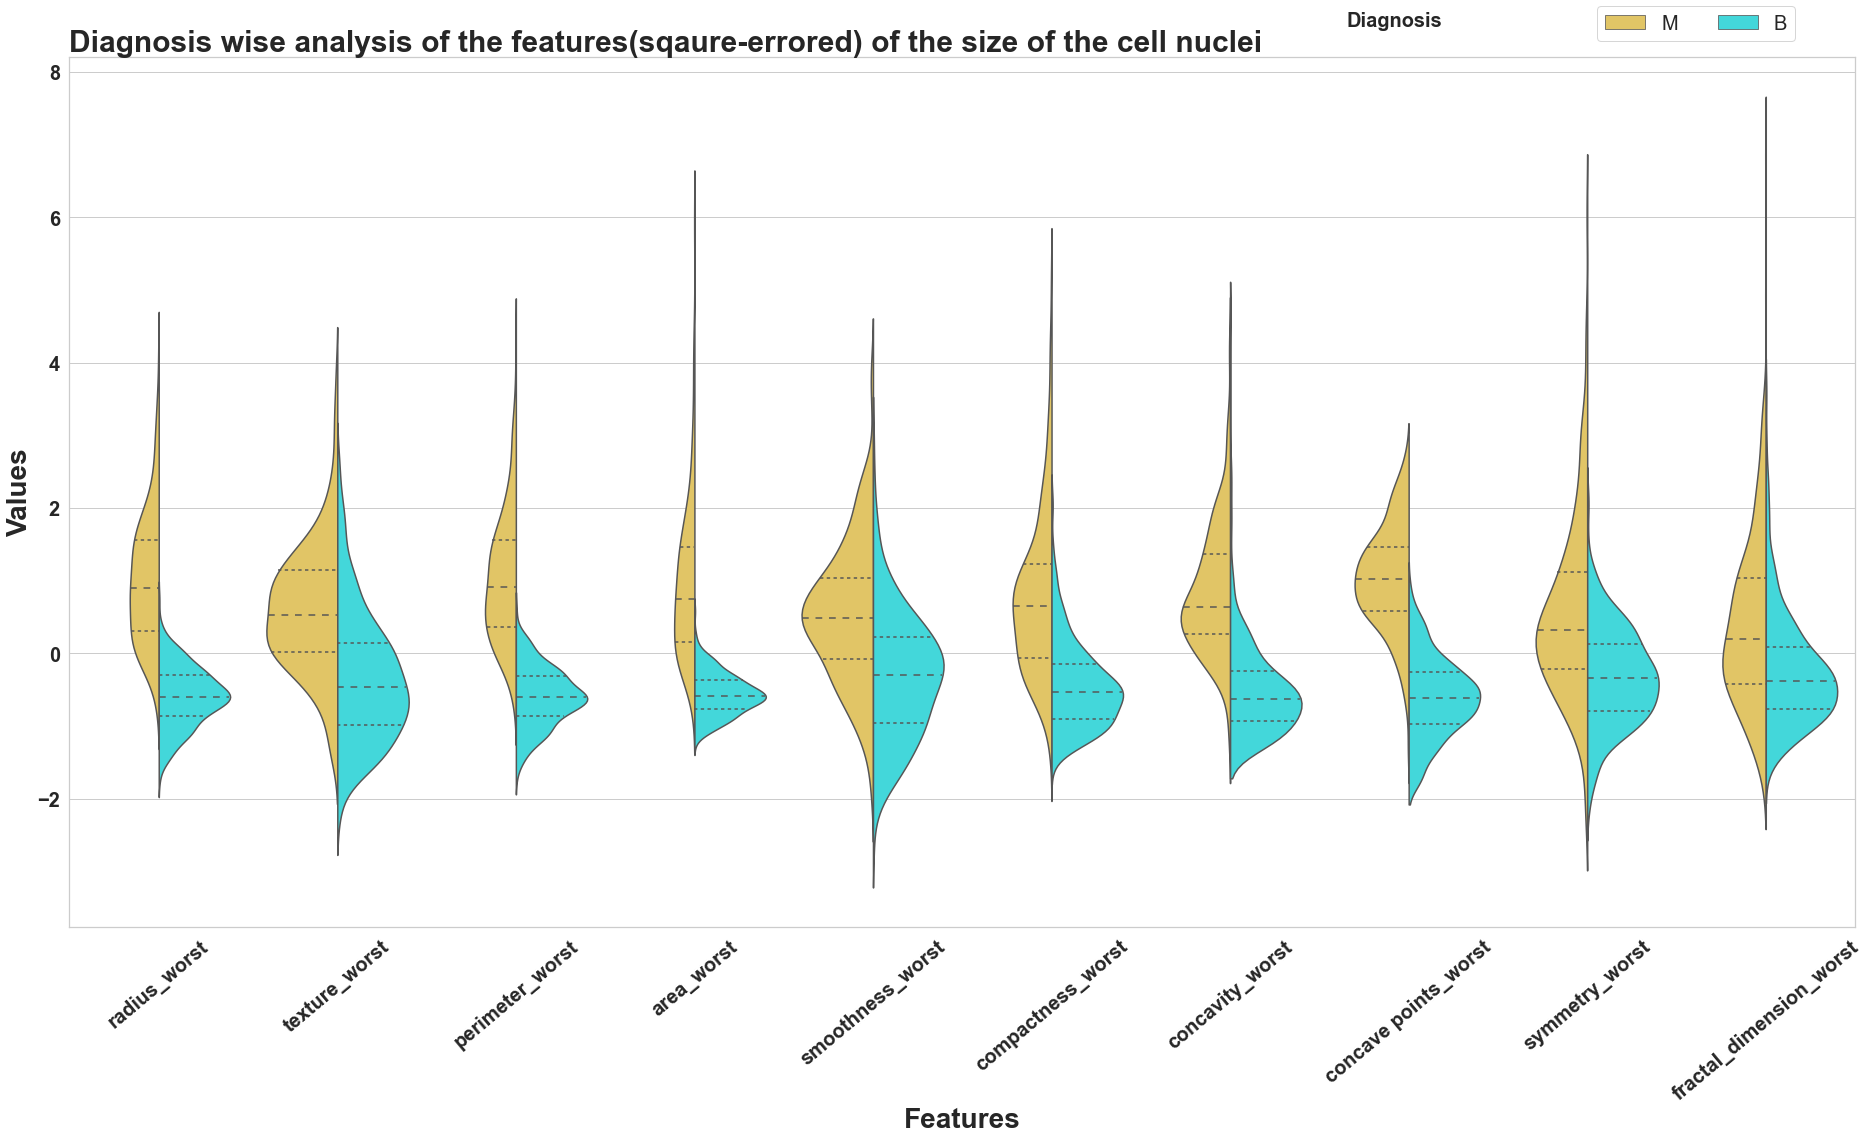

In [16]:
sns.set(style="whitegrid", palette="deep", color_codes=True)
fig,ax= plt.subplots(1, figsize=(32,16), facecolor='white')
new_data= pd.concat([y,x_std.iloc[:,20:30]],axis=1)
new_data= pd.melt(new_data,id_vars="diagnosis",var_name="Features",value_name='value')
sns.violinplot(x="Features", y="value", hue="diagnosis",
               split=True, inner="quart", color='white',
               palette={"B": "#2AEFF3", "M": "#F6D051"},
               data=new_data)

plt.title('Diagnosis wise analysis of the features(sqaure-errored) of the size of the cell nuclei', fontsize=30, fontweight= 'bold', loc='left')

plt.legend(frameon=True, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
plt.text(6.65, 8.63, 'Diagnosis', fontsize=20,fontweight='bold')

plt.xticks(fontsize=20, fontweight='bold', rotation=40)
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize=28,fontweight='bold')
plt.ylabel("Values",fontsize=28,fontweight='bold')

plt.show()

From the above graph, we observe similarities between radius_worst and perimeter_worst. The violin plots for concavity_worst and concave points_worst are also very similar. If two violin plots seem identical, then there is a high correlation between the two features, hence one of the features must be dropped.

In [17]:
def jp(f1, f2, ax=None):
    import scipy.stats as stats
    sns.set(style="white",color_codes=True)
    joint_plot= sns.jointplot(x_std.loc[:,f1], x_std.loc[:,f2], kind="reg",color="k")
    r, p = stats.pearsonr(x_std.loc[:,f1], x_std.loc[:,f2])
    text, = joint_plot.ax_joint.plot([], [], linestyle="", alpha=0)
    joint_plot.ax_joint.legend([text],['pearsonr={:f}, p={:e}'.format(r,p)])
    plt.title
    plt.show()

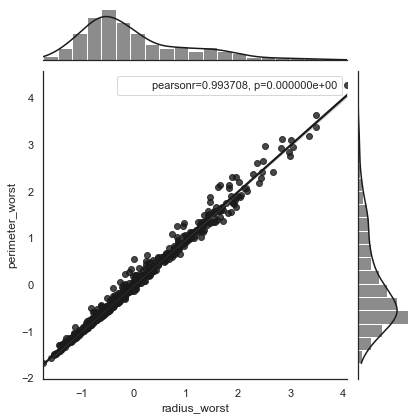

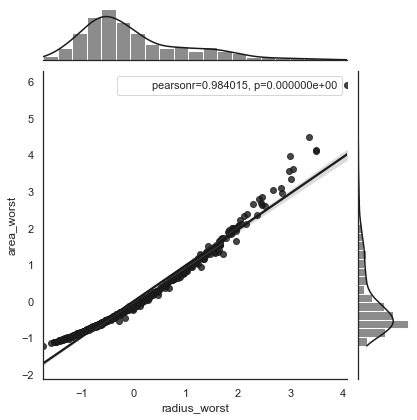

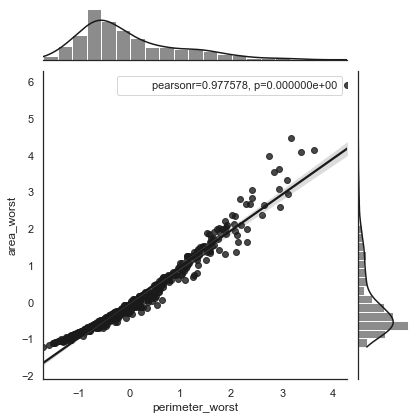

In [18]:
g0= jp("radius_worst","perimeter_worst")
g1= jp("radius_worst","area_worst")
g2= jp("perimeter_worst","area_worst")

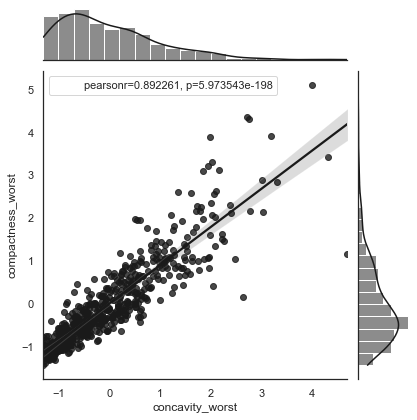

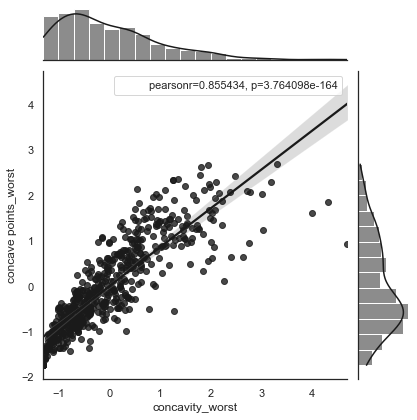

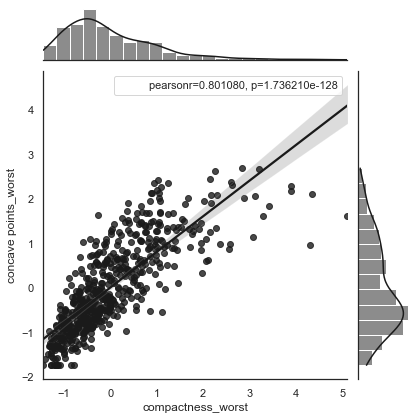

In [19]:
h0= jp("concavity_worst","compactness_worst")
h1= jp("concavity_worst","concave points_worst")
h2= jp("compactness_worst","concave points_worst")

From the above graph, we can see that radius_worst and perimeter_worst are strongly correlated as expected. The two features have a linear relation owing to the 2pi ratio between radius & perimeter of the cell nuclei. Concavity_worst and concave points_worst also have a strong correlation.

### Observing multicollinearity among distinct features of the dataset

<Figure size 1080x1080 with 0 Axes>

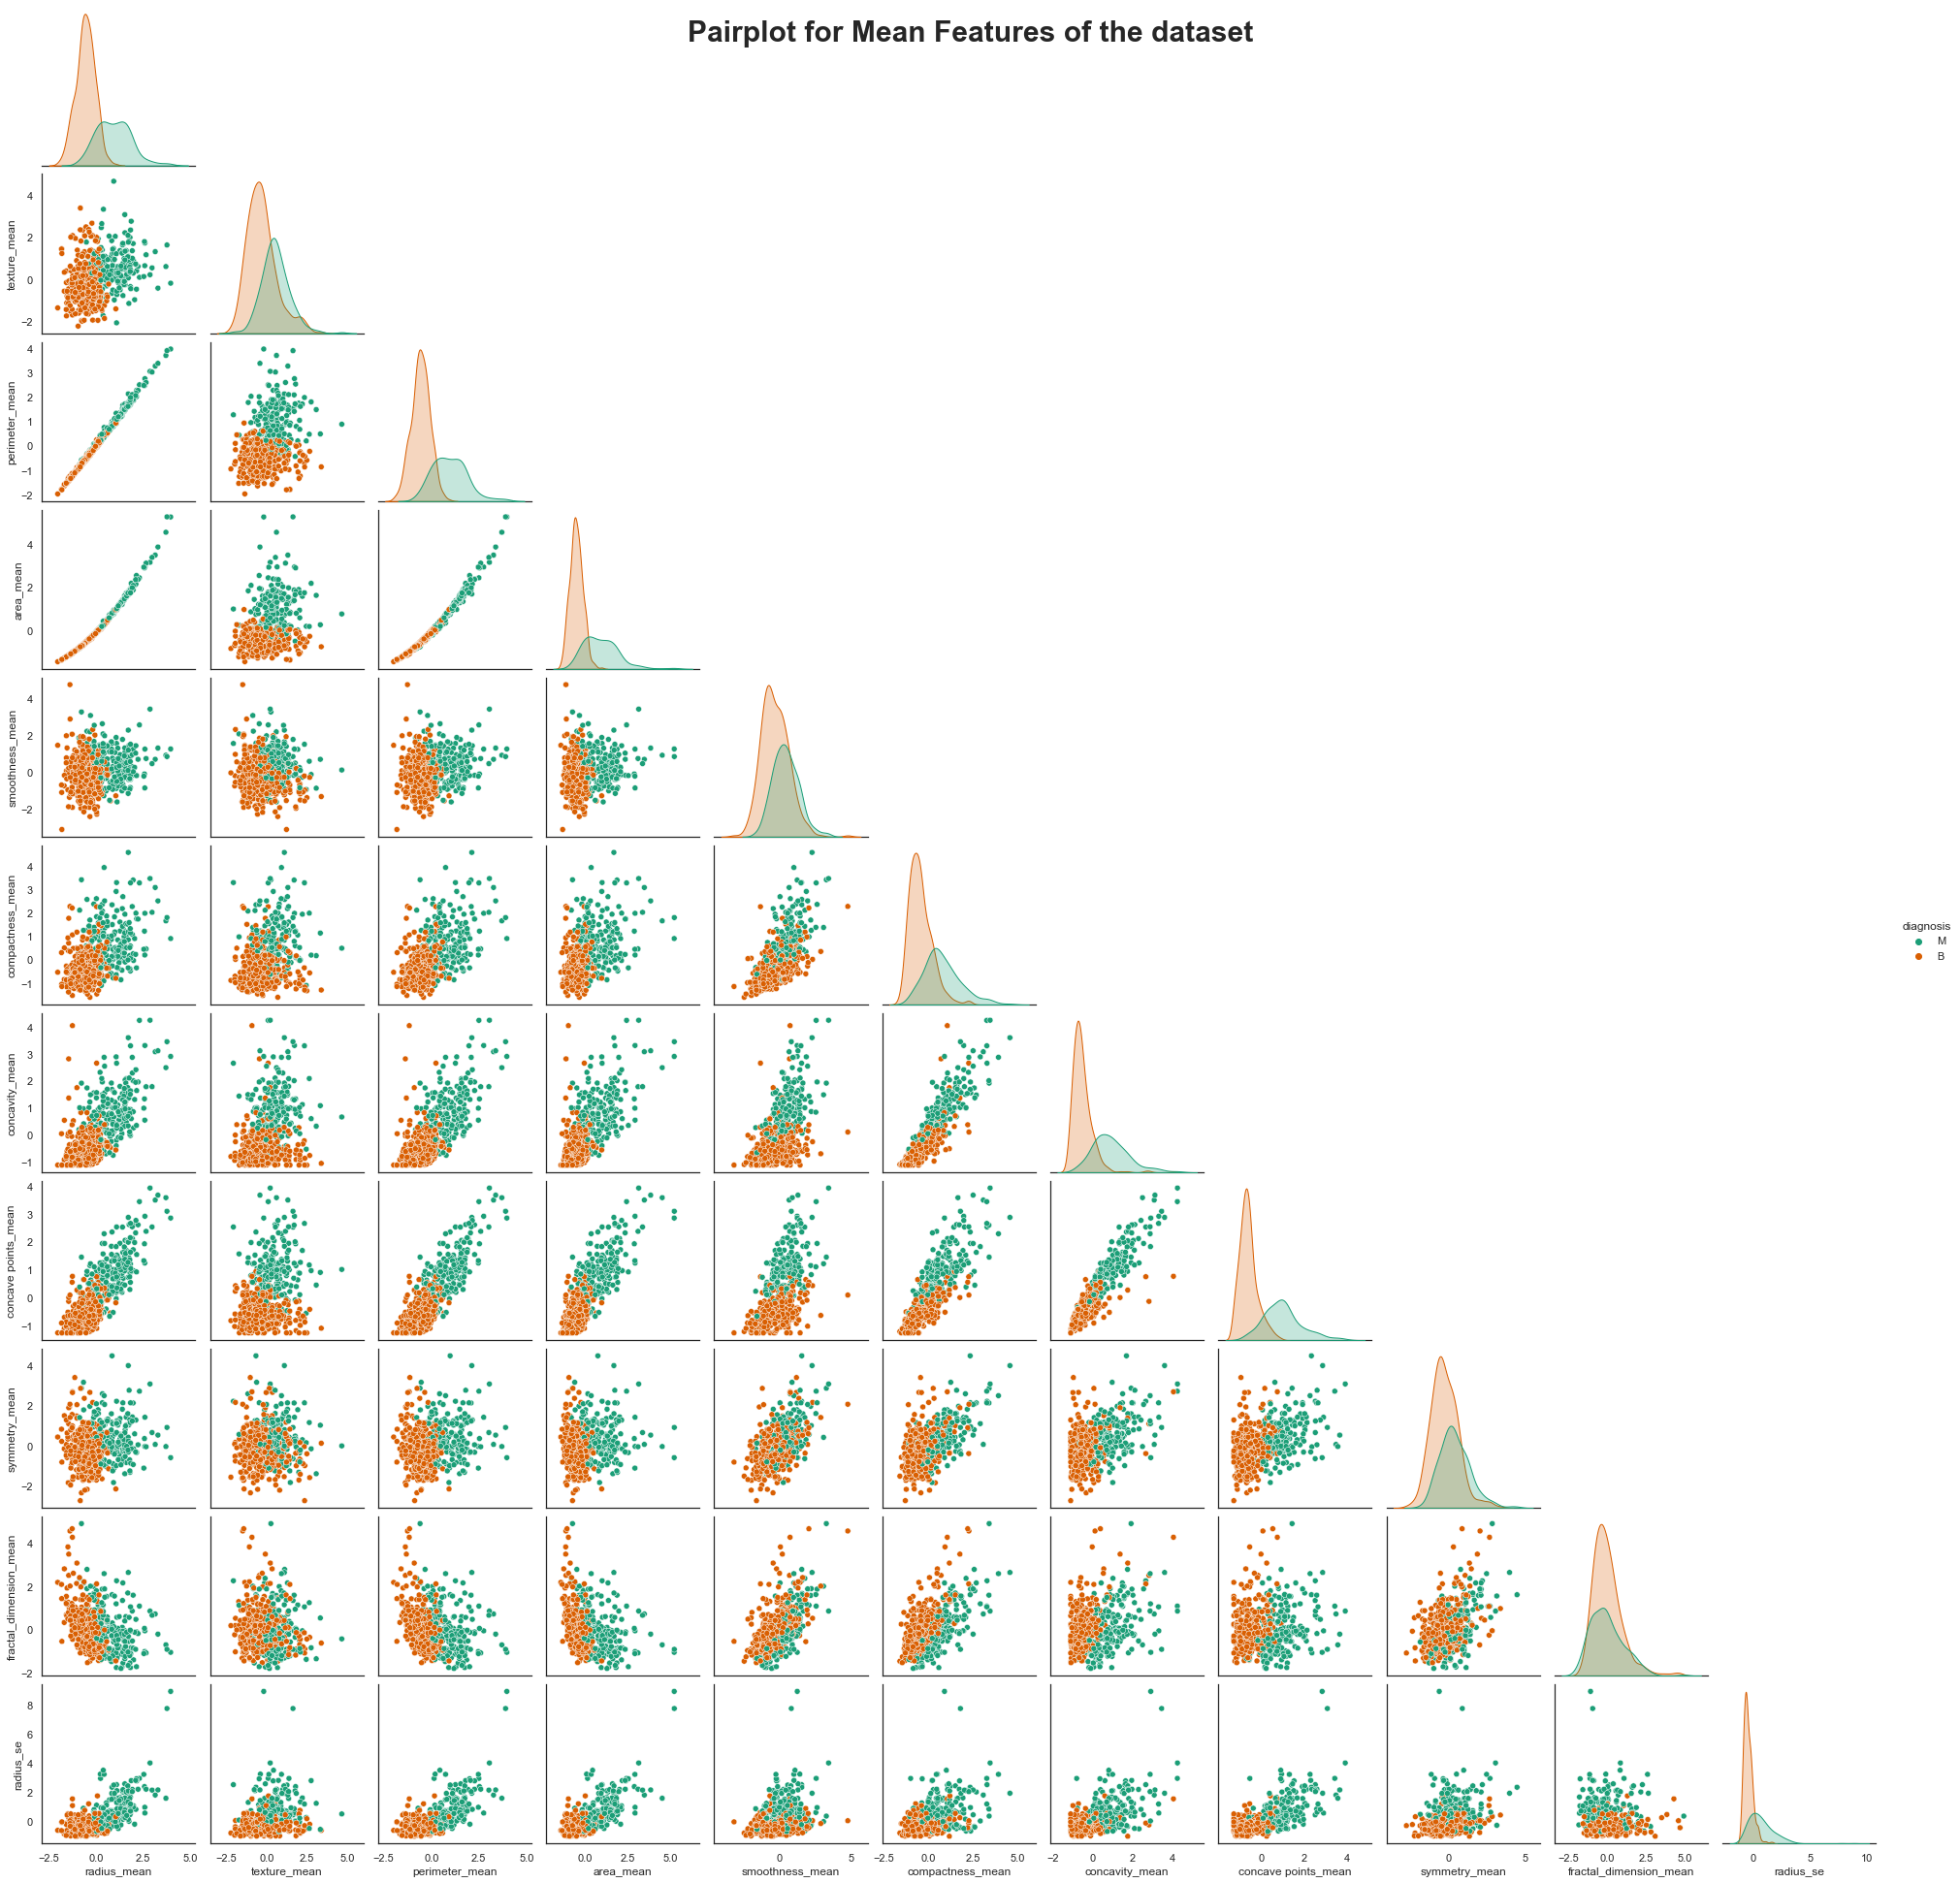

In [20]:
plt.figure(figsize=(15,15))
data= pd.concat([y,x_std.iloc[:,0:11]],axis=1)
g=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Dark2", corner=True)
g.fig.suptitle('Pairplot for Mean Features of the dataset',fontsize=30,fontweight='bold')
plt.show()

<Figure size 1080x1080 with 0 Axes>

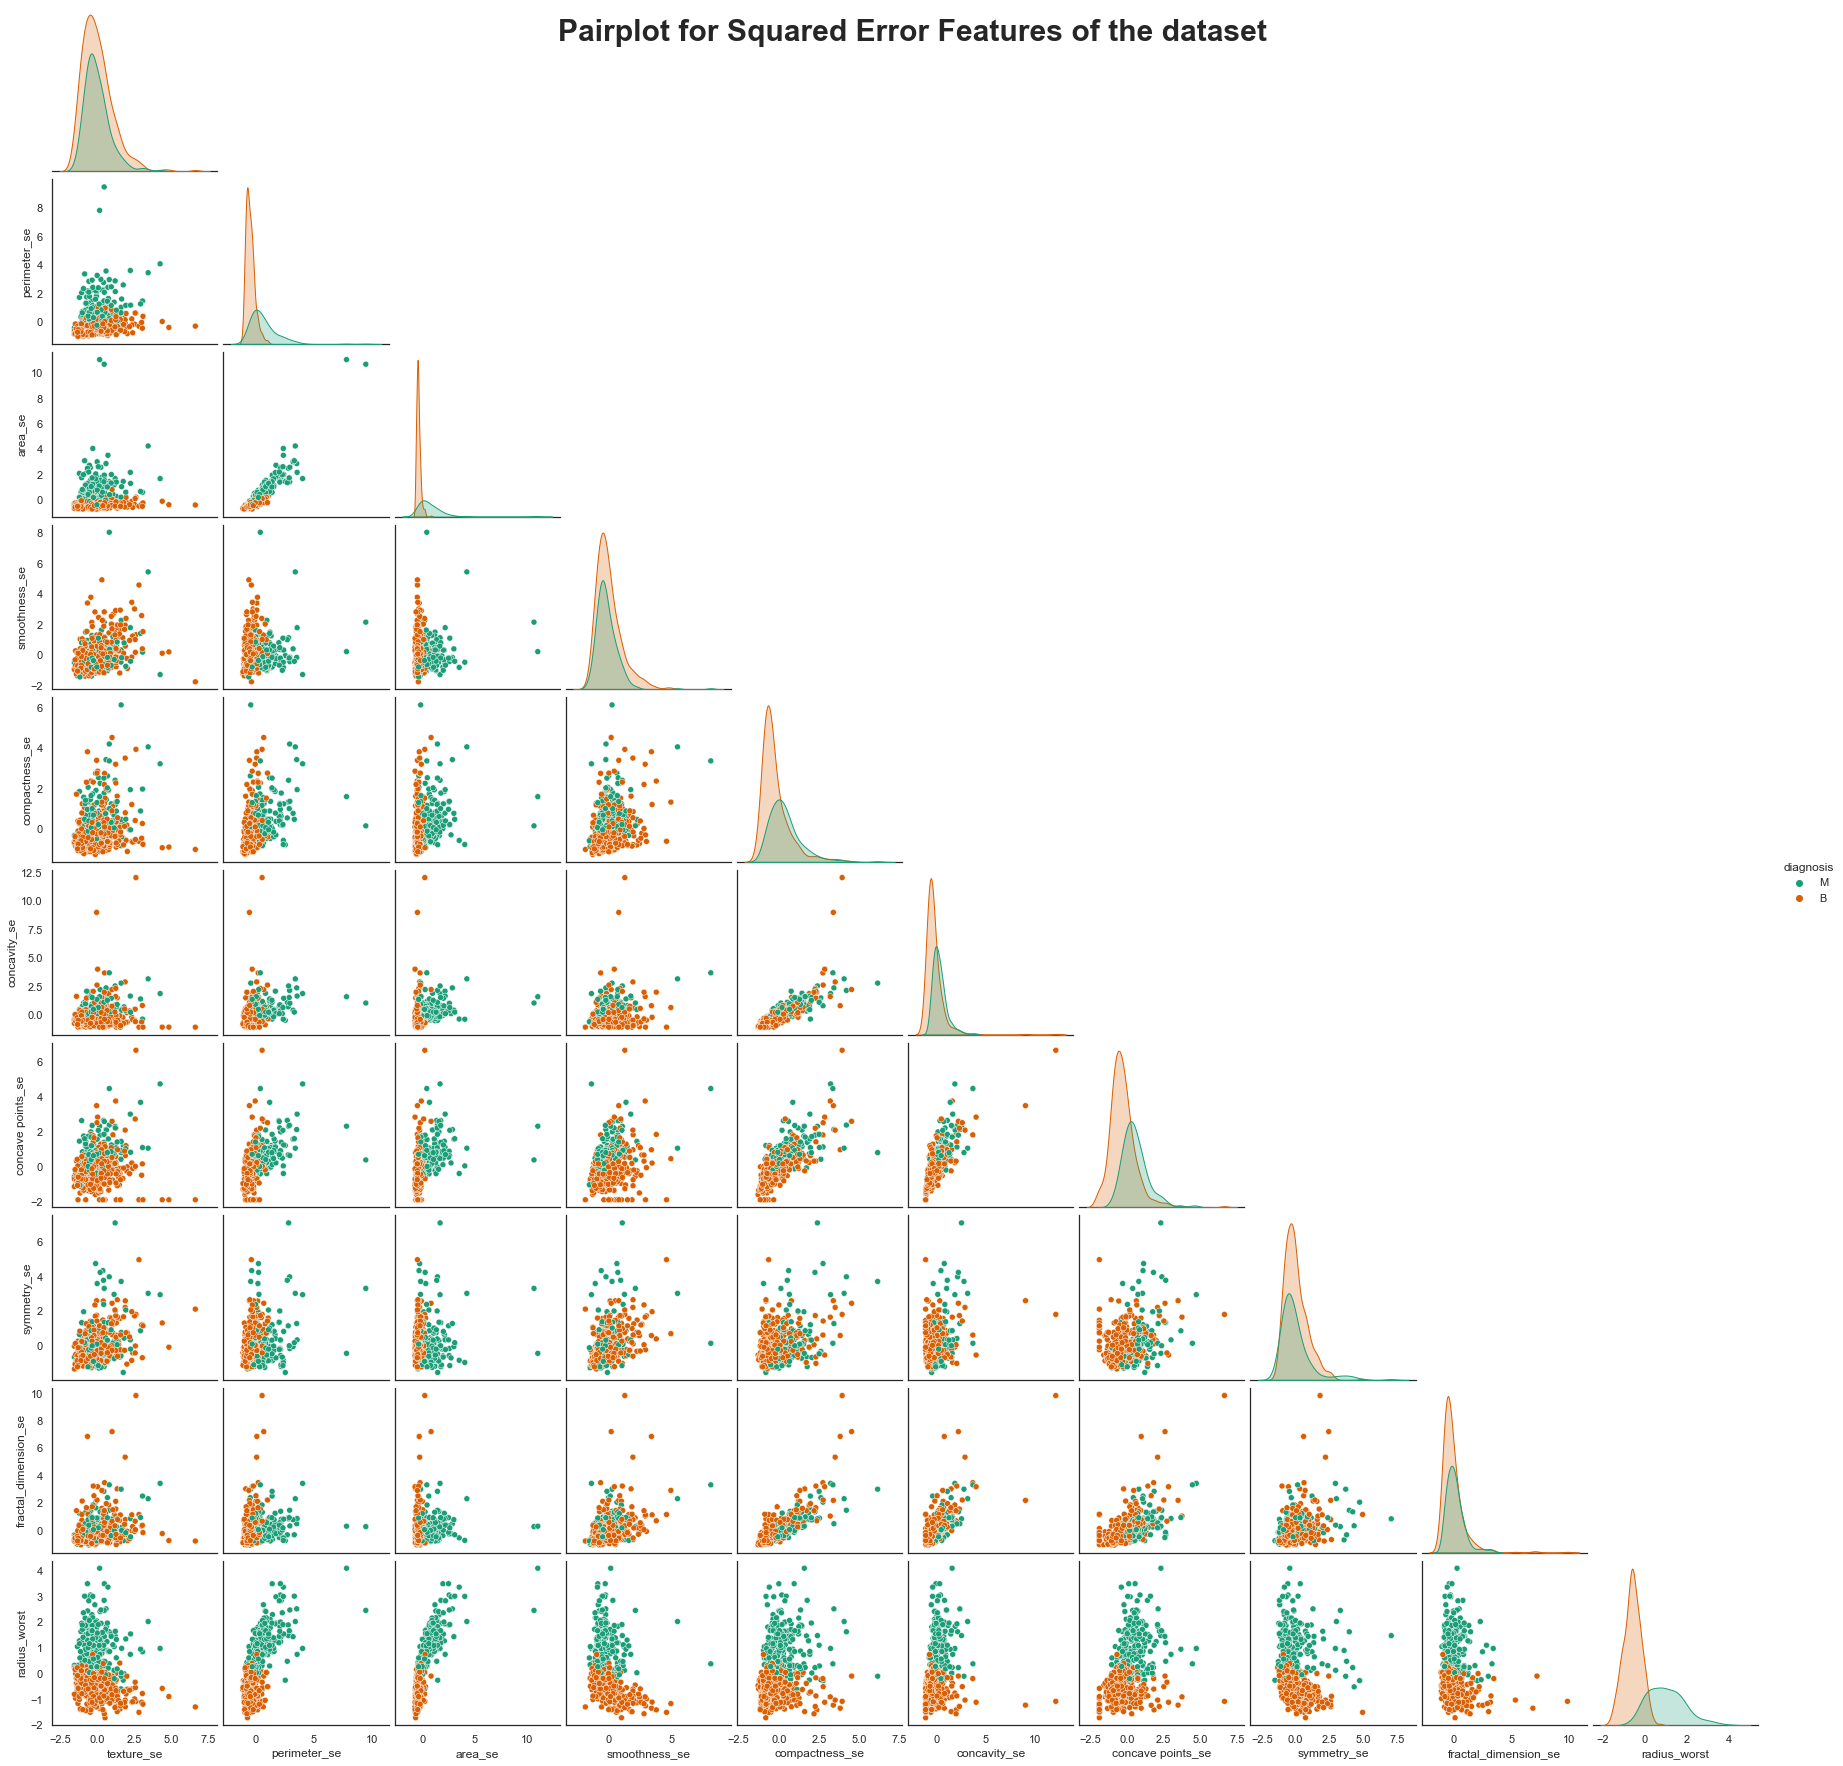

In [21]:
plt.figure(figsize=(15,15))
data= pd.concat([y,x_std.iloc[:,11:21]],axis=1)
g=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Dark2", corner=True)
g.fig.suptitle('Pairplot for Squared Error Features of the dataset',fontsize=30,fontweight='bold')
plt.show()

<Figure size 1080x1080 with 0 Axes>

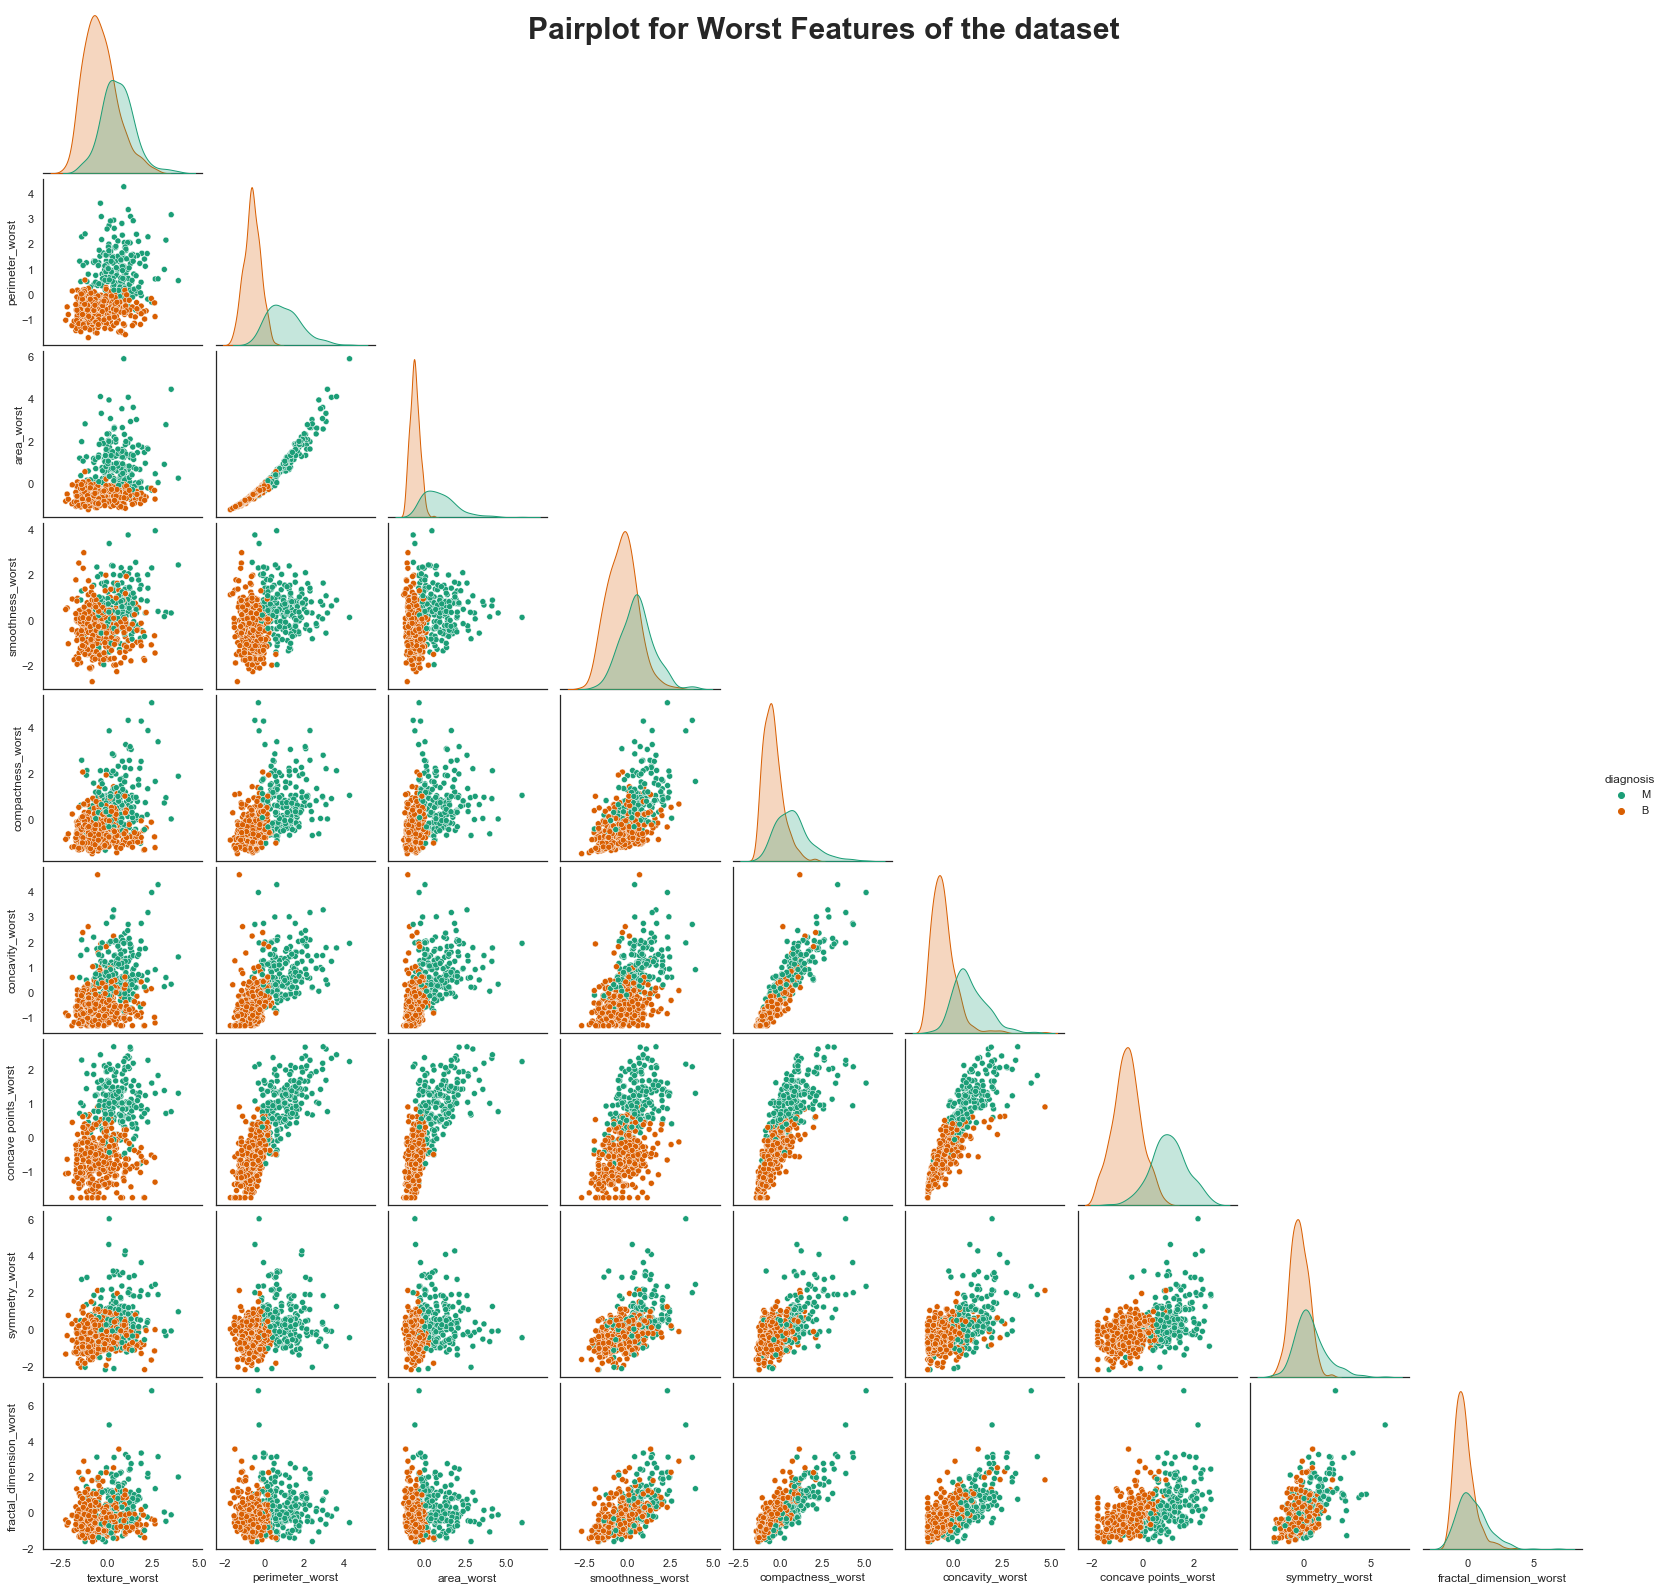

In [22]:
plt.figure(figsize=(15,15))
data= pd.concat([y,x_std.iloc[:,21:31]],axis=1)
g=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Dark2", corner=True)
g.fig.suptitle('Pairplot for Worst Features of the dataset',fontsize=30,fontweight='bold')
plt.show()

From the 3 pairplot visualizations, we observe linear patterns between radius, parameter and area attributes indicating a strong multicollinear relationship among these variables. The features compactness, concavity and concave points are also multicollinear.

### Correlation Heatmap between the Nucleus Features

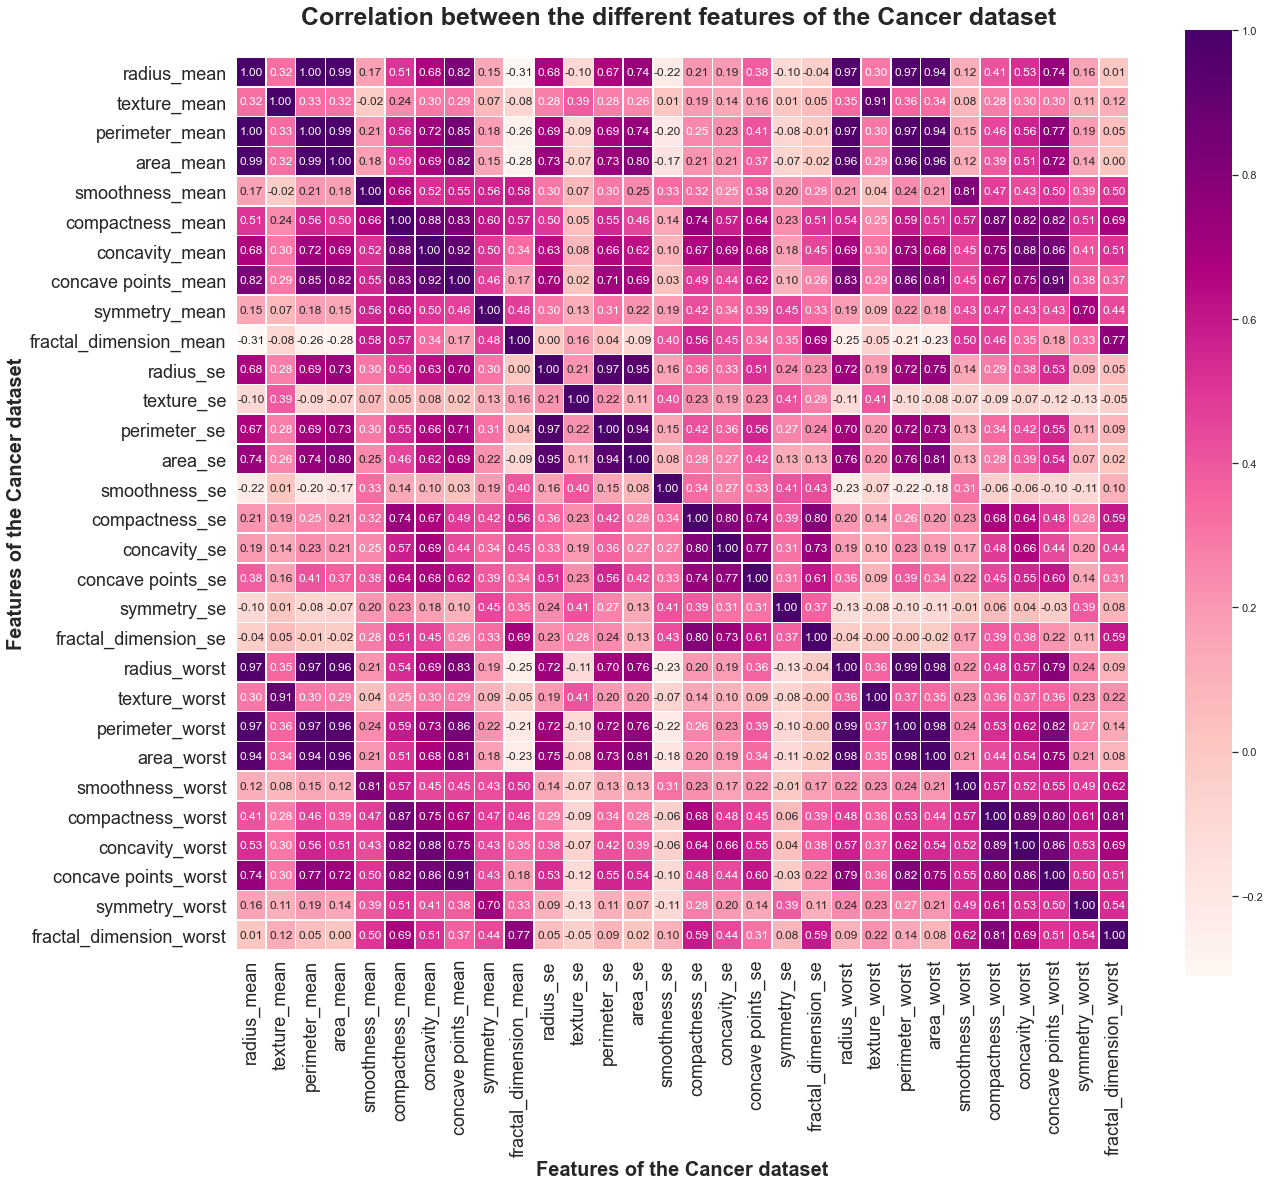

In [23]:
f,ax = plt.subplots(figsize=(20, 30))
cancer_correlated_features=breast_cancer_data.corr()
sns.heatmap(cancer_correlated_features, cmap='RdPu',annot=True,annot_kws={"size":12},square=True, linewidths=.5, fmt= '.2f',cbar_kws={'shrink': 0.58},ax=ax)
ax.set_title('Correlation between the different features of the Cancer dataset \n',fontsize=25,fontweight='bold')

ax.set_ylabel('Features of the Cancer dataset',fontsize=20,fontweight='bold')
ax.set_xlabel('Features of the Cancer dataset',fontsize=20,fontweight='bold')


ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

From the above heatmap, we can confirm for sure that the features radius, perimeter and area are highly correlated. This indicates multicollinearity among these variables because all the 3 features describe similar details i.e. the physical size of the nuclei of the cell.  Therefore, for going forward with our analysis, we should pick one of the three features. We will use area_mean because the violin plot for this feature indicates significant differences between malignant and benign tumors compared to the rest.

The features compactness, concavity and concave points also show a high correlation. Therefore, for going forward with our analysis, we should pick one of the three features. We will use concavity_mean.

Having redundant features can reduce the generalization capability of a model which may effect the accuarcy of the classifier

The same applies for square error and worst features of the dataset.

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/